Project : 

## FlySmart: Uncovering Airline Pricing Secrets with Data



This project explores key factors that influence airline ticket prices using real-world data from over 300,000 flight records. It uncovers how pricing varies with airlines, departure and arrival times, source and destination cities, booking lead time, and travel class. The analysis combines SQL for quantitative exploration, Python for data visualization, and Power BI for interactive storytelling.

Import all required libraries : 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns

Setting the plot style and size :

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = (12, 6)
sns.set_style("whitegrid")

###
Importing airlines_flights_data (afa) : 

In [7]:
afa = pd.read_csv("airlines_flights_data.csv",index_col='index' )

In [8]:
afa.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
index,,,,,,,,,,,
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


###
##### Data Validation and data shape and info enquiry :

In [9]:
print(afa.shape)


(300153, 11)


Our dataset is having 300153 rows and 11 columns.

In [11]:
afa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


There is no null value available in our dataset.

In [13]:
afa.describe(include='all')


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


| Column             | Status                                  | Action Needed?                      |
| ------------------ | --------------------------------------- | ----------------------------------- |
| `airline`          | 6 unique, top = Vistara                 | ✅ Clean & usable                    |
| `flight`           | 1561 unique, top = UK-706               | ✅ Unique flight codes — good        |
| `source_city`      | 6 unique, top = Delhi                   | ✅ Fine, but check spelling cases    |
| `departure_time`   | 6 unique, top = Morning                 | ✅ Already binned — ready for visual |
| `stops`            | 3 values (probably: non-stop, one, two) | ✅ Okay                              |
| `arrival_time`     | 6 time slots (e.g., Night, Evening)     | ✅ Okay                              |
| `destination_city` | 6 cities, top = Mumbai                  | ✅ Good                              |
| `class`            | 2 values (Economy, Business)            | ✅ Valid                             |


checking for outliers in price:

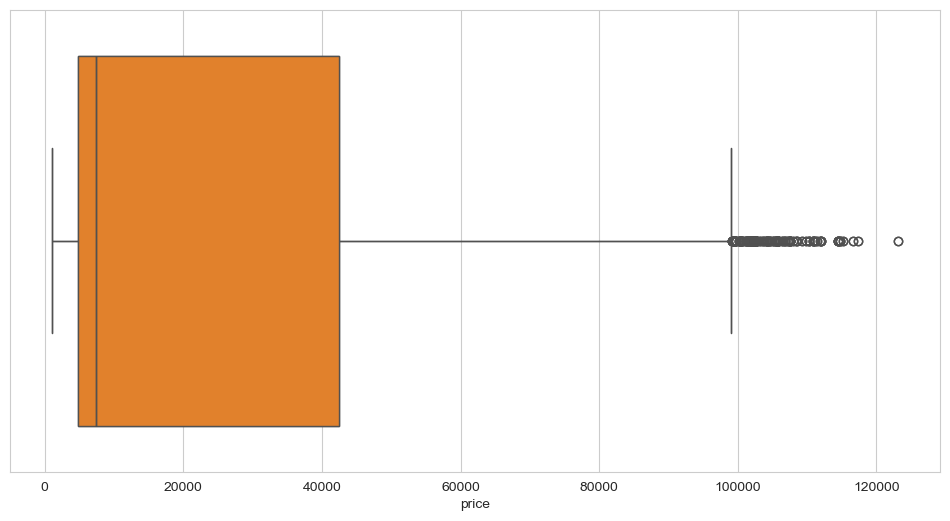

In [15]:
sns.boxplot(x=afa['price'])
plt.show()


It seems there are some outliers 

Using Z-score method to extract the outliers rows to  understand the pricing :

In [18]:
from scipy.stats import zscore

afa['zscore'] = zscore(afa['price'])


outliers = afa[(afa['zscore'] > 3) | (afa['zscore'] < -3)]
print(outliers)


        airline  flight source_city departure_time stops arrival_time  \
index                                                                   
206787  Vistara  UK-707       Delhi        Evening   one        Night   
206878  Vistara  UK-819       Delhi      Afternoon   one        Night   
210742  Vistara  UK-747       Delhi  Early_Morning   one    Afternoon   
210743  Vistara  UK-747       Delhi  Early_Morning   one        Night   
215854  Vistara  UK-985       Delhi        Evening   one      Morning   
...         ...     ...         ...            ...   ...          ...   
299018  Vistara  UK-822     Chennai        Morning   one      Evening   
299407  Vistara  UK-828     Chennai  Early_Morning   one      Evening   
299458  Vistara  UK-822     Chennai        Morning   one      Evening   
299700  Vistara  UK-828     Chennai  Early_Morning   one      Evening   
300068  Vistara  UK-828     Chennai  Early_Morning   one      Evening   

       destination_city     class  duration  days_

seems 602 rows are currently in outliers , sorting the to understand the higher pricing :

In [21]:
outliers.sort_values(by='price', ascending=False)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,zscore
index,,,,,,,,,,,,
261377,Vistara,UK-772,Kolkata,Morning,one,Night,Delhi,Business,13.50,3,123071,4.501831
216096,Vistara,UK-811,Delhi,Early_Morning,two_or_more,Evening,Kolkata,Business,10.92,5,117307,4.247885
215859,Vistara,UK-809,Delhi,Evening,two_or_more,Evening,Kolkata,Business,21.08,1,116562,4.215062
277345,Vistara,UK-870,Hyderabad,Night,one,Afternoon,Mumbai,Business,16.42,3,115211,4.155541
270999,Vistara,UK-772,Kolkata,Morning,one,Evening,Hyderabad,Business,9.50,17,114705,4.133248
...,...,...,...,...,...,...,...,...,...,...,...,...
280351,Vistara,UK-890,Hyderabad,Evening,one,Night,Bangalore,Business,29.00,2,89009,3.001152
280391,Vistara,UK-870,Hyderabad,Night,one,Evening,Bangalore,Business,20.42,3,89009,3.001152
280736,Vistara,UK-880,Hyderabad,Afternoon,one,Night,Bangalore,Business,7.00,10,89009,3.001152


It seems most of the classes for outliers are business class , which emply why the price is high but to be confirmed we will check if there is any economy class on this outliers

In [23]:
len(outliers[outliers['class'] == 'Economy'])

0

There is no Economy class in outlier so all the outlier prices are for business class.

We will retain the outlier as they represent valid Business class bookings, essential for analyzing premium pricing and revenue trends without losing critical insights.

Checking for duplicate records :

In [25]:
len(afa[afa.duplicated()])

0

Our data set is very clean without any duplicate rows

Standadising text column : 

In [26]:
cols = ['airline', 'flight', 'source_city', 'departure_time',
        'stops', 'arrival_time', 'destination_city', 'class']

for col in cols:
    afa[col] = afa[col].str.strip().str.title()


Inspecting unique values in those important columns to understand the structure of your dataset : 

In [36]:
cols = ['airline', 'source_city', 'departure_time', 'stops', 
        'arrival_time', 'destination_city', 'class']

for col in cols:
    print(f"\nValue counts in '{col}':\n")
    print(afa[col].value_counts(),"\n")
    print("-" * 40)
    



Value counts in 'airline':

airline
Vistara      127859
Air_India     80892
Indigo        43120
Go_First      23173
Airasia       16098
Spicejet       9011
Name: count, dtype: int64 

----------------------------------------

Value counts in 'source_city':

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64 

----------------------------------------

Value counts in 'departure_time':

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64 

----------------------------------------

Value counts in 'stops':

stops
One            250863
Zero            36004
Two_Or_More     13286
Name: count, dtype: int64 

----------------------------------------

Value counts in 'arrival_time':

arrival_time
Night            91538
Evening          78323
Morning          62735
Afte

##

### Answering Business Questions :


###
##### Q1. What are the airlines in the dataset, accompanied by their frequencies?

In [40]:
airline_counts = afa['airline'].value_counts()

airline_counts

airline
Vistara      127859
Air_India     80892
Indigo        43120
Go_First      23173
Airasia       16098
Spicejet       9011
Name: count, dtype: int64

Plotting bar graph for visualisation : 

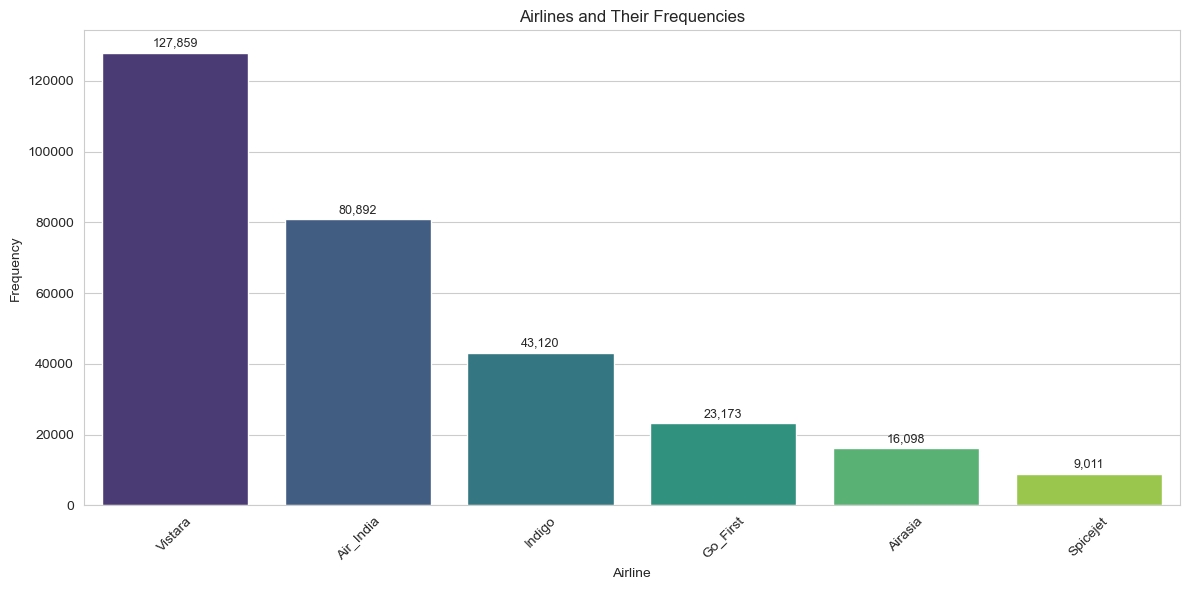

In [45]:
sns.barplot(x=airline_counts.index, y=airline_counts.values, hue=airline_counts.index, palette='viridis', legend=False)

for i, value in enumerate(airline_counts.values):
    plt.text(i, value + 1000, f'{value:,}', ha='center', va='bottom', fontsize=9)
    
plt.xlabel("Airline")
plt.ylabel("Frequency")
plt.title("Airlines and Their Frequencies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- This bar chart visualizes the number of flights operated by different airlines based on the dataset.

- Vistara leads significantly with 127,859 flights, followed by Air India and Indigo with 80,892 and 43,120 respectively.

- Go First, AirAsia, and SpiceJet show relatively lower frequencies.

- This indicates a strong market presence for Vistara and Air India during the recorded period.

###
##### Q2. Show Bar Graphs representing the Departure Time & Arrival Time.

In [69]:
departure_time = afa["departure_time"].value_counts()
departure_time

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

Departure Time Insights:

- The majority of flights take off in the Morning (71,146) and Early Morning (66,790).

- Evening (65,102) and Night (48,015) departures are also frequent.

- Very few flights depart in the Late Night (1,306) slot.

In [68]:
arrival_time = afa["arrival_time"].value_counts()
arrival_time

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

Arrival Time Insights :

Most flights land at Night (91,538) and Evening (78,323).

Morning arrivals (62,735) are also common.

Early Morning (15,417) and Late Night (14,001) arrivals are significantly fewer.

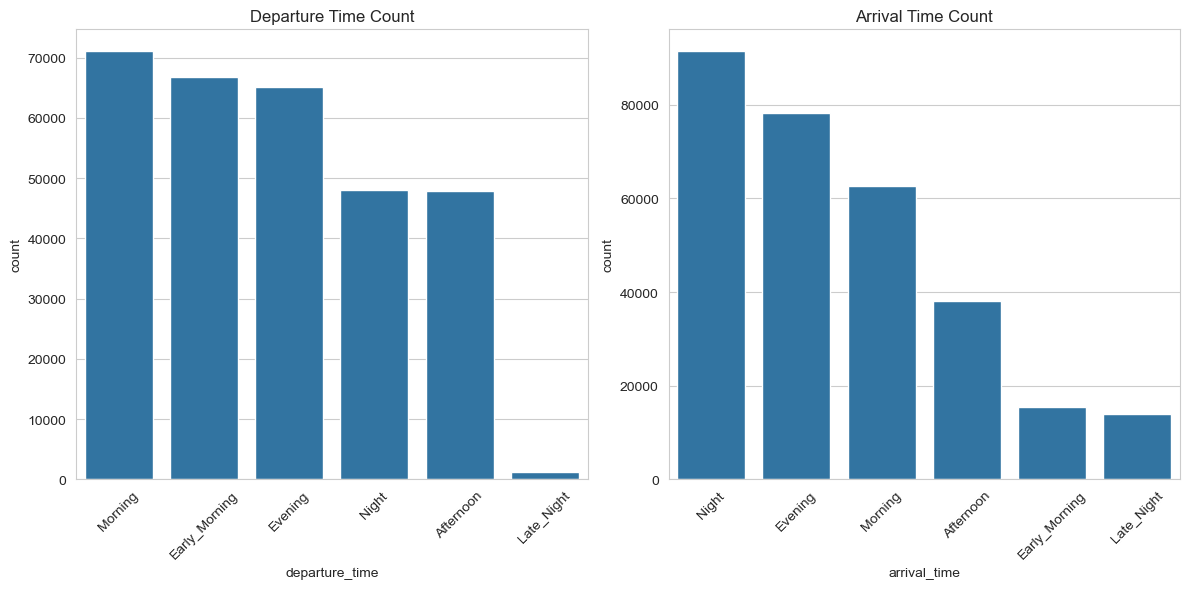

In [54]:
plt.subplot(1, 2, 1)
sns.countplot(data=afa, x='departure_time', order=afa['departure_time'].value_counts().index)

plt.title('Departure Time Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(data=afa, x='arrival_time', order=afa['arrival_time'].value_counts().index)
plt.title('Arrival Time Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Morning and Early Morning are peak departure times, indicating high travel demand during the start of the day.

Night arrivals dominate, likely reflecting long-haul or end-of-day flights.

Late Night slots are underutilized for both departures and arrivals. 

###
##### Q3. Show Bar Graphs representing the Source City & Destination City.

In [81]:
afa['source_city'].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [82]:
afa['destination_city'].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

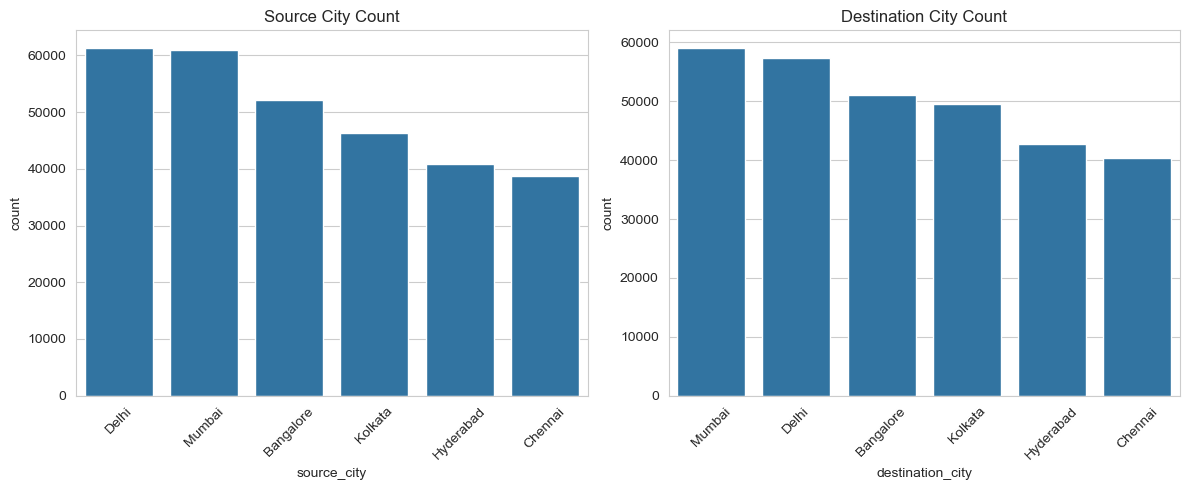

In [79]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=afa, x='source_city', order=afa['source_city'].value_counts().index)
plt.title('Source City Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(data=afa, x='destination_city', order=afa['destination_city'].value_counts().index)
plt.title('Destination City Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


- Delhi and Mumbai are the top two cities in both departure and arrival volumes, indicating they are central hubs in the network, likely due to high population density and economic activity.

- Bangalore and Kolkata follow closely in both roles, reflecting their importance in regional and intercity connectivity.

- The overall trend shows that the ranking of cities remains consistent between source and destination, suggesting balanced two-way traffic.

- Notably, the departure counts are slightly higher than the arrival counts for most cities, which might point to route imbalances or filtering at the dataset level.

- Chennai and Hyderabad, while slightly lower in volume, still maintain strong connectivity and rank similarly in both categories.

###
##### Q4. Does price vary with airlines ?


In [90]:
afa.groupby('airline')['price'].describe().round(2)


,count,mean,std,min,25%,50%,75%,max
airline,,,,,,,,
Air_India,80892.0,23507.02,20905.12,1526.0,5623.0,11520.0,45693.0,90970.0
Airasia,16098.0,4091.07,2824.06,1105.0,2361.0,3276.0,4589.0,31917.0
Go_First,23173.0,5652.01,2513.87,1105.0,4205.0,5336.0,6324.0,32803.0
Indigo,43120.0,5324.22,3268.89,1105.0,3219.0,4453.0,6489.0,31952.0
Spicejet,9011.0,6179.28,2999.63,1106.0,4197.0,5654.0,7412.0,34158.0
Vistara,127859.0,30396.54,25637.16,1714.0,6412.0,15543.0,55377.0,123071.0


Average Price (mean):

- Vistara has the highest mean price (₹30,397), followed by Air India (₹23,507).

- Airasia has the lowest mean price (₹4,091), suggesting it is a budget airline.

Price Consistency (standard deviation - std):

- A higher standard deviation indicates more variability in ticket prices.

- Vistara (₹25,637) and Air India (₹20,905) show large variability, which may reflect multiple fare classes (economy to business).

- Airasia and Go First have the lowest variability, indicating more uniform pricing.

Price Range (min to max):

- Vistara again has the widest range (₹1,714 to ₹1,23,071).

- Budget airlines like Airasia and Go First have a narrower range, capping below ₹33,000.

- Median and Quartiles (25%, 50%, 75%):

- Vistara’s median (₹15,543) is significantly higher than others, supporting its premium pricing model.

- The IQR (75% - 25%) is also widest for Vistara, reinforcing its high pricing spread.

Coefficient of Variation (CV) method :

To compare relative variation of prices across airlines:

Lower CV means more consistent pricing; higher CV means more volatile pricing.

In [91]:
cv = afa.groupby('airline')['price'].agg(['mean', 'std'])
cv['cv'] = (cv['std'] / cv['mean']).round(2)
cv.sort_values('cv', ascending=False)


,mean,std,cv
airline,,,
Air_India,23507.019112,20905.116909,0.89
Vistara,30396.536302,25637.159445,0.84
Airasia,4091.072742,2824.055172,0.69
Indigo,5324.216303,3268.894831,0.61
Spicejet,6179.278881,2999.630406,0.49
Go_First,5652.007595,2513.865560,0.44


- To assess price variability across airlines without relying on a graph, we calculated the coefficient of variation (CV)—the ratio of standard deviation to mean price.

- Vistara and Air India have the highest mean prices (₹30,396 and ₹23,507 respectively) and also high variability (CVs of 0.84 and 0.89), indicating that these full-service airlines offer a wide range of fare classes (economy to business), possibly with flexible pricing.

- In contrast, low-cost carriers like Go First, SpiceJet, and IndiGo show lower mean prices (₹5,652, ₹6,179, ₹5,324) and lower CVs (0.44–0.61), suggesting more consistent and affordable pricing.

- Airasia, although a budget airline, shows a slightly higher CV (0.69), hinting at more variation in ticket pricing compared to its peers.

ANOVA Test (Statistical significance) :

To quantitatively test whether the differences in prices across airlines are statistically significant:

In [93]:
from scipy.stats import f_oneway

groups = [group['price'].values for name, group in afa.groupby('airline')]
f_stat, p_value = f_oneway(*groups)

print("F-statistic:", round(f_stat, 2))
print("p-value:", p_value)


F-statistic: 17194.4
p-value: 0.0


To test whether average flight prices significantly differ across airlines, a one-way ANOVA test was performed.

F-statistic: 17,194.4

p-value: 0.0 (effectively < 0.001)

👉 Interpretation:

The very high F-statistic indicates strong between-group variance compared to within-group variance.

A p-value of 0.0 confirms the result is highly statistically significant.

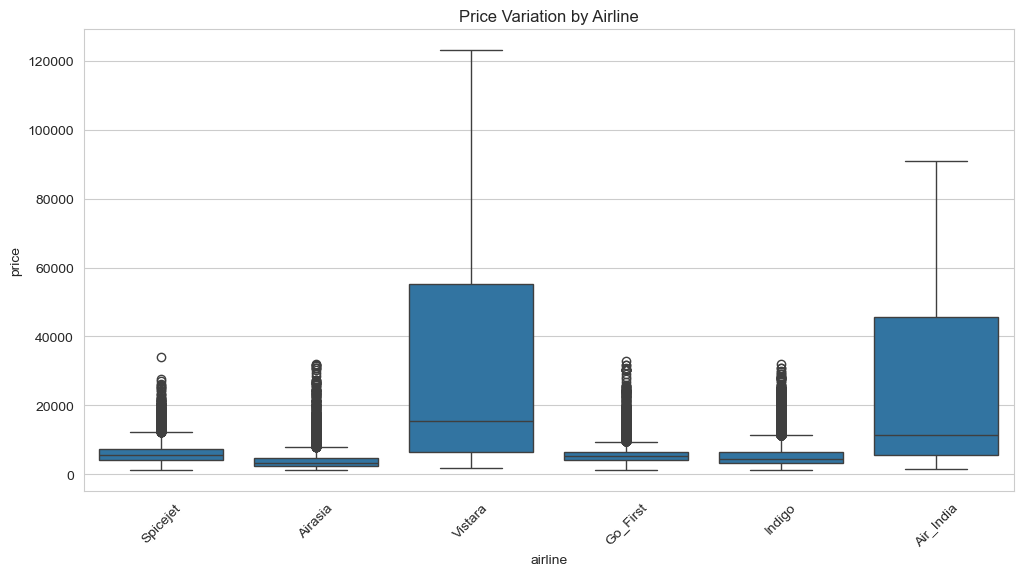

In [83]:
plt.figure(figsize=(12,6))
sns.boxplot(data=afa, x='airline', y='price')
plt.title('Price Variation by Airline')
plt.xticks(rotation=45)
plt.show()

There is strong statistical evidence that flight prices differ significantly across airlines.

- Air India and Vistara offer premium flights with high price ranges and high variability.

- Go First and SpiceJet maintain more consistent and affordable pricing, which could appeal to budget-conscious travelers.

- The statistical significance (p < 0.001) confirms that airline choice heavily influences price.

###
##### Q5. Does ticket price change based on the departure time and arrival time?


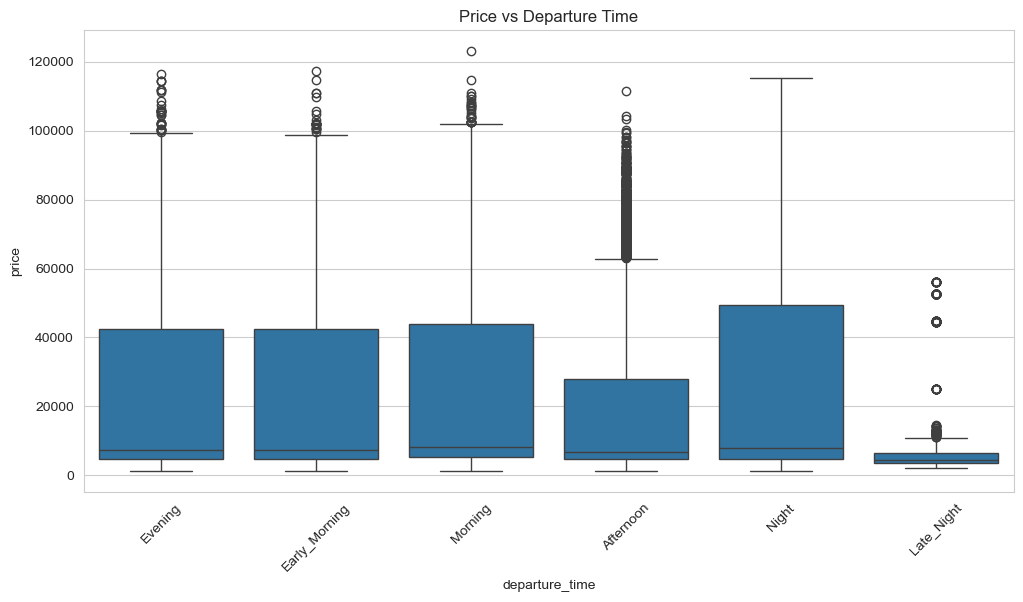

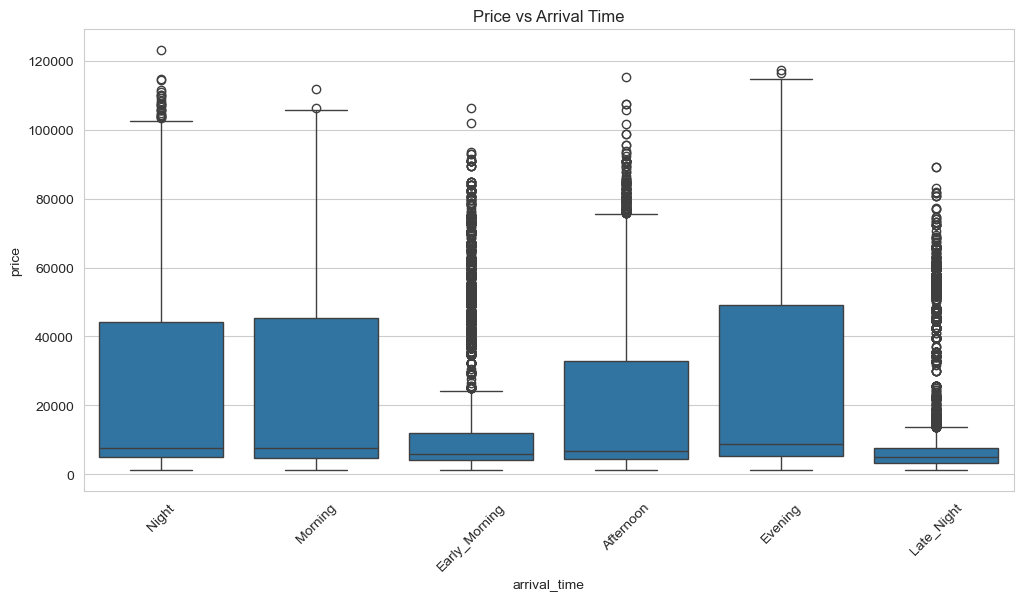

In [84]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=afa, x='departure_time', y='price')
plt.title('Price vs Departure Time')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=afa, x='arrival_time', y='price')
plt.title('Price vs Arrival Time')
plt.xticks(rotation=45)
plt.show()



###
##### Q6. How does the price change with change in Source and Destination?


In [97]:
# Mean prices by departure time
departure_group_means = afa.groupby('departure_time')['price'].mean().sort_values()

# Mean prices by arrival time
arrival_group_means = afa.groupby('arrival_time')['price'].mean().sort_values()

print("Average Price by Departure Time:")
print(departure_group_means)

print("\nAverage Price by Arrival Time:")
print(arrival_group_means)


Average Price by Departure Time:
departure_time
Late_Night        9295.299387
Afternoon        18179.203331
Early_Morning    20370.676718
Evening          21232.361894
Morning          21630.760254
Night            23062.146808
Name: price, dtype: float64

Average Price by Arrival Time:
arrival_time
Late_Night       11284.906078
Early_Morning    14993.139521
Afternoon        18494.598993
Night            21586.758341
Morning          22231.076098
Evening          23044.371615
Name: price, dtype: float64


Insights:

- Prices are lowest for Late Night departures and arrivals.

- Tickets arriving or departing in the Evening or Night are the most expensive, possibly due to higher demand in those time slots.

- There is a clear upward trend in price with departure/arrival time from Late Night to Night/Evening.



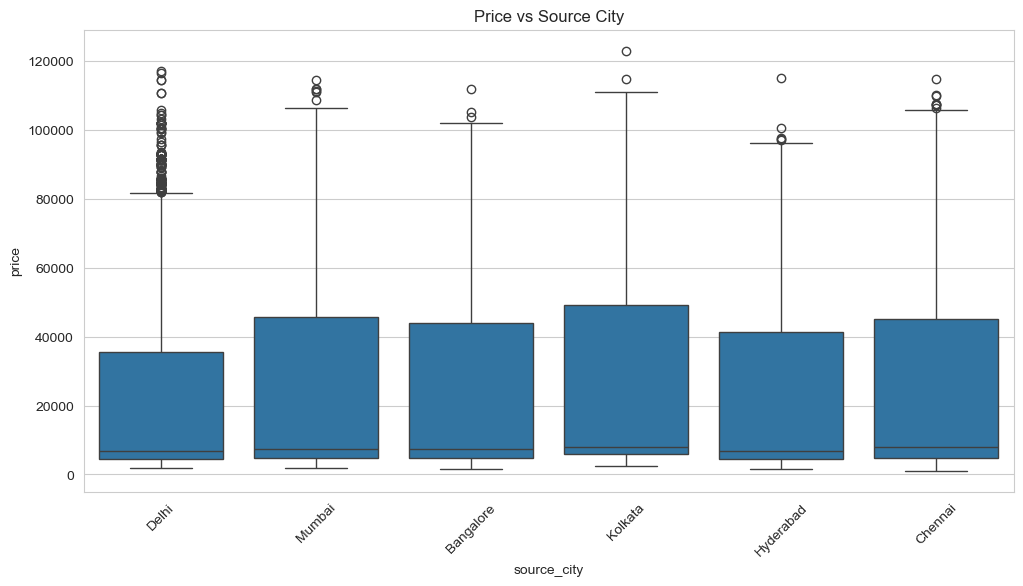

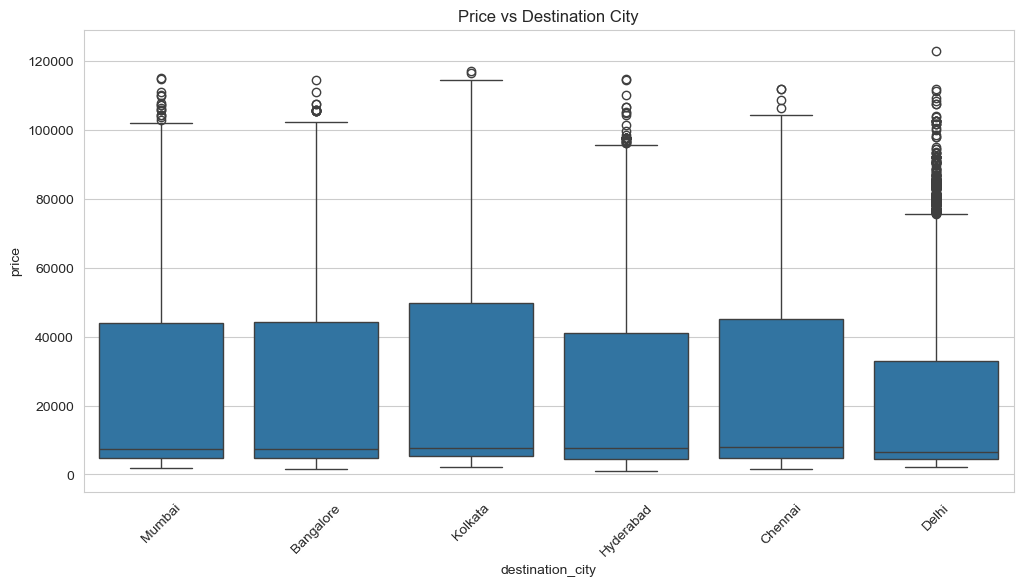

In [85]:
plt.figure(figsize=(12,6))
sns.boxplot(data=afa, x='source_city', y='price')
plt.title('Price vs Source City')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=afa, x='destination_city', y='price')
plt.title('Price vs Destination City')
plt.xticks(rotation=45)
plt.show()


In [100]:
from scipy.stats import f_oneway

# Group prices by departure_time
grouped_dep = [group['price'].values for name, group in afa.groupby('departure_time')]

# Run ANOVA
f_stat_dep, p_val_dep = f_oneway(*grouped_dep)
print(f"Departure Time ANOVA - F-statistic: {f_stat_dep:.2f}, p-value: {p_val_dep:.4f}")

# Group prices by arrival_time
grouped_arr = [group['price'].values for name, group in afa.groupby('arrival_time')]

# Run ANOVA
f_stat_arr, p_val_arr = f_oneway(*grouped_arr)
print(f"Arrival Time ANOVA - F-statistic: {f_stat_arr:.2f}, p-value: {p_val_arr:.4f}")


Departure Time ANOVA - F-statistic: 319.24, p-value: 0.0000
Arrival Time ANOVA - F-statistic: 1013.50, p-value: 0.0000


To explore the impact of departure and arrival times on ticket prices, both visual (boxplots) and numerical (ANOVA + average price) methods were used.

🔹 Numerical Analysis – ANOVA Results
Departure Time ANOVA:
F-statistic = 319.24, p-value = 0.0000

Arrival Time ANOVA:
F-statistic = 1013.50, p-value = 0.0000

✅ Interpretation:
The extremely low p-values (< 0.05) indicate a statistically significant difference in ticket prices across different departure and arrival time categories.

###
##### Q7. How is the price affected when tickets are bought just 1 or 2 days before departure?



In [101]:
last_min = afa[afa['days_left'] <= 2]
regular = afa[afa['days_left'] > 2]

print("Average Price (Last-Minute):", last_min['price'].mean())
print("Median Price (Last-Minute):", last_min['price'].median())

print("Average Price (Regular):", regular['price'].mean())
print("Median Price (Regular):", regular['price'].median())


Average Price (Last-Minute): 27421.169326390056
Median Price (Last-Minute): 16739.0
Average Price (Regular): 20757.498484024472
Median Price (Regular): 7347.0


1. Average Price Comparison:

- Last-Minute Bookings: ₹27,421 (avg)

- Regular Bookings: ₹20,757 (avg)

Conclusion: On average, last-minute tickets are ₹6,663 more expensive, which is a ~32% price increase.

2. Median Price Comparison:

- Last-Minute Median: ₹16,739

- Regular Median: ₹7,347

Conclusion: The median price nearly doubles, showing that not just outliers, but a majority of last-minute tickets tend to cost significantly more.

Interpretation:

- Both average and median prices are higher for last-minute bookings, suggesting higher base prices and possibly price surges due to low availability or urgent demand.

- The gap between mean and median (especially for last-minute) indicates the distribution is right-skewed — some very high-priced tickets are pulling the mean up.

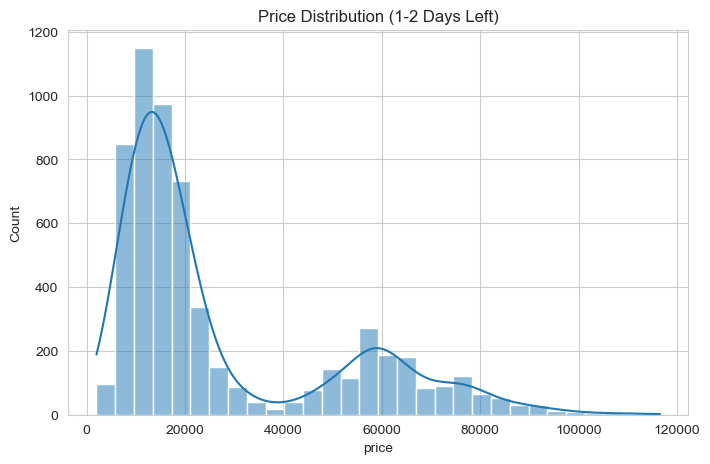

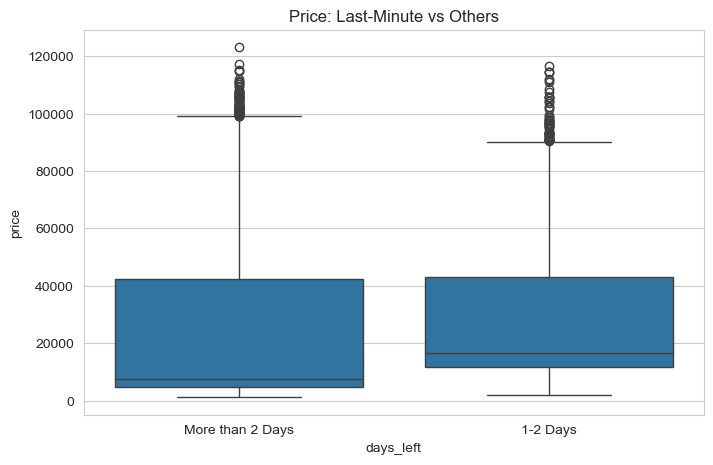

In [86]:
last_min = afa[afa['days_left'] <= 2]
plt.figure(figsize=(8,5))
sns.histplot(last_min['price'], bins=30, kde=True)
plt.title('Price Distribution (1-2 Days Left)')
plt.show()

# Compare to all prices
plt.figure(figsize=(8,5))
sns.boxplot(x=afa['days_left'] <= 2, y=afa['price'])
plt.title('Price: Last-Minute vs Others')
plt.xticks([0,1], ['More than 2 Days', '1-2 Days'])
plt.show()


- Booking last-minute significantly increases the risk of paying more.

- Airlines can capitalize on urgent travel needs with higher pricing.

- Users should be encouraged to book early to avoid premium fares.

- Pricing strategy seems effective for revenue optimization on urgent bookings.

###
##### Q8. How does the ticket price vary between Economy and Business class?

In [102]:
afa.groupby('class')['price'].describe()


,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Business,93487.0,52540.081124,12969.314606,12000.0,45185.0,53164.0,60396.0,123071.0
Economy,206666.0,6572.342383,3743.519517,1105.0,4173.0,5772.0,7746.0,42349.0


💡 Numerical Comparison & Interpretation:
1. Mean Ticket Price:
Business: ₹52,540

Economy: ₹6,572
👉 Business class is on average 8x more expensive than Economy class.

2. Median Ticket Price:
Business: ₹53,164

Economy: ₹5,772
👉 The typical (central) business class ticket costs almost ₹47,000 more than economy.

3. Spread of Prices (Std Dev):
Business: ±₹12,969

Economy: ±₹3,743
👉 Business class fares show higher variability, meaning the price ranges fluctuate more.

4. Price Range:
Business: ₹12,000 → ₹1,23,071

Economy: ₹1,105 → ₹42,349
👉 Business has a much higher upper bound, indicating some premium or luxury services.

✅ Conclusion:
Business class fares are significantly higher than Economy, both in mean and median.

The price distribution in Business is wider, possibly due to different service levels or demand-based pricing.

You can clearly see this in the boxplot as well – two completely different distributions.

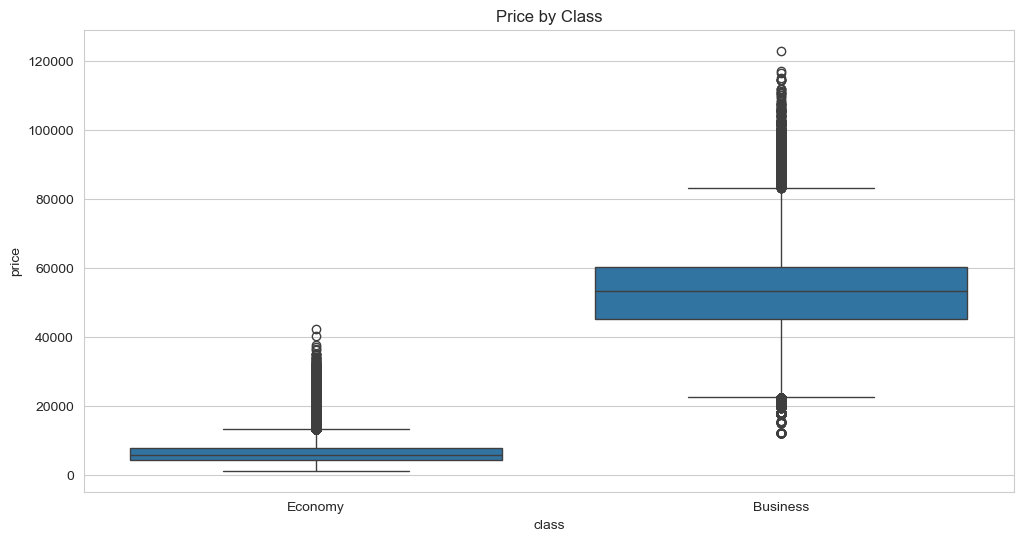

In [88]:
sns.boxplot(data=afa, x='class', y='price')
plt.title('Price by Class')
plt.show()


###
##### Q9. What will be the average price of Vistara airline for a flight from Delhi to Hyderabad in Business Class?



In [89]:
filtered = afa[
    (afa['airline'] == 'Vistara') &
    (afa['source_city'] == 'Delhi') &
    (afa['destination_city'] == 'Hyderabad') &
    (afa['class'] == 'Business')
]

avg_price = filtered['price'].mean()
print("Average Price:", avg_price)


Average Price: 47939.840361445786
